# Домашнее задание к лекции "Проблемы качества данных"

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from IPython.display import Image

In [2]:
housing = pd.read_csv('/home/lena/Netology/Feature Engineering/Lecture_1_new/housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# 1. Масштабирование

а. Нормализовать признак - median_income 

In [6]:
from sklearn import preprocessing

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
housing['median_income_norm'] = min_max_scaler.fit_transform(housing[['median_income']])

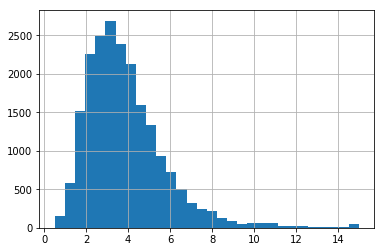

In [8]:
housing['median_income'].hist(bins=30)

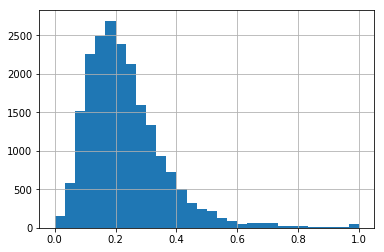

In [9]:
housing['median_income_norm'].hist(bins=30)

б. Привести признак - population к масштабу от 0 до 100

In [10]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 100))
housing["population_scl"] = scaler.fit_transform(housing[["population"]])

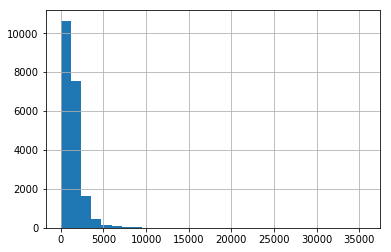

In [11]:
housing["population"].hist(bins=30)

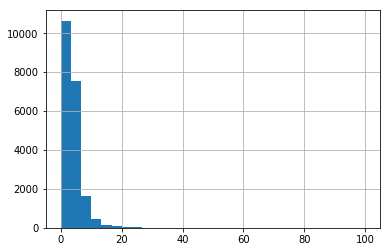

In [12]:
housing["population_scl"].hist(bins=30)

# 2. Заполнение пропусков

Заполнить пропуски в столбце total_bedrooms средними значениями по категориям столбца ocean_proximity Например, если пропущенно значение в строке с категорией INLAND, нужно заполнить его средним значением по этой категории

In [13]:
housing[housing['total_bedrooms'].isna() == True].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_norm,population_scl
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,0.267245,1.589170
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,0.077220,2.043219
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,0.143191,10.476751
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,0.306823,1.067855
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,0.234921,1.076263


In [14]:
housing['total_bedrooms']= housing.groupby("ocean_proximity")['total_bedrooms'].transform(lambda x: x.fillna(x.mean()))

In [15]:
housing[housing['total_bedrooms'].isna() == True].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_norm,population_scl


# 3. Категорийные атрибуты

а. Посчитать среднее кол-во комнат в строке (total_rooms/households) 

In [16]:
housing["avg_rooms"] = housing["total_rooms"]/housing["households"]

In [17]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_norm,population_scl,avg_rooms
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.539668,0.894083,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.538027,6.721040,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.466028,1.381765,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.354699,1.555537,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.230776,1.575156,6.281853


б. Разбить полученный столбец на группы на ваше усмотрение (Например, 1 комната, 2 комнаты, 3 и более комнат)

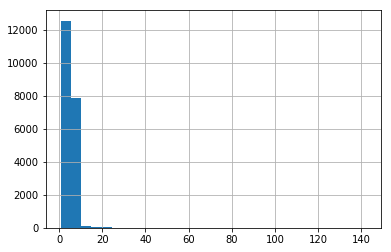

In [18]:
housing["avg_rooms"].hist(bins=30)

In [19]:
housing["avg_rooms"] = housing["avg_rooms"].round(0)

In [20]:
housing.groupby("avg_rooms")['total_rooms'].count().reset_index()

,avg_rooms,total_rooms
0,1.0,9
1,2.0,159
2,3.0,1012
3,4.0,4333
4,5.0,6728
5,6.0,5166
6,7.0,2048
7,8.0,731
8,9.0,194
9,10.0,63


In [21]:
housing["avg_rooms_bins"] = pd.cut(housing["avg_rooms"], bins=[0,3,4,5,6,7,145],labels=['<= 3 комнат','4 комнаты','5 комнат','6 комнат', '7 комнат', '>= 8 комнат'])

In [23]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,median_income_norm,population_scl,avg_rooms,avg_rooms_bins
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.539668,0.894083,7.0,7 комнат
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.538027,6.721040,6.0,6 комнат
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.466028,1.381765,8.0,>= 8 комнат
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.354699,1.555537,6.0,6 комнат
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.230776,1.575156,6.0,6 комнат


In [24]:
housing.groupby('avg_rooms_bins').count()[['avg_rooms']].sort_values('avg_rooms', ascending=False)

,avg_rooms
avg_rooms_bins,
5 комнат,6728
6 комнат,5166
4 комнаты,4333
7 комнат,2048
>= 8 комнат,1185
<= 3 комнат,1180
